<a href="https://colab.research.google.com/github/mars241/WebScraping/blob/main/AAM_WCS__Regex_python_Challenge_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💪 challenge
##### Pour valider ce challenge, tu dois répondre aux questions ci-dessous en trouvant la Regex qui te permet d'obtenir le résultat attendu.

Texte à utiliser pour ce challenge :

"Matrix (31/03/1999) - 130 minutes. IMDB note 9/10 (https://www.imdb.com/title/tt0133093). Thomas A. Anderson (Keanu Reeves), un jeune informaticien connu dans le monde du hacking sous le pseudonyme de Neo, est contacté via son ordinateur par ce qu’il pense être un groupe de hackers. Ils lui font découvrir que le monde dans lequel il vit n’est qu’un monde virtuel, la matrice, dans lequel les êtres humains sont gardés sous contrôle. Morpheus (Laurence Fishburne), le capitaine du Nebuchadnezzar, contacte Neo et pense que celui-ci est l’Élu qui peut libérer les êtres humains du joug des machines et prendre le contrôle de la matrice"

Copie le texte ci-dessus affecte le à une variable appelée 'texte'. Tu as vu quelques fonctions du module re dans la quête, et pour répondre aux questions ci-dessous, tu utiliseras la fonctions findall()

#  Site de IMDB

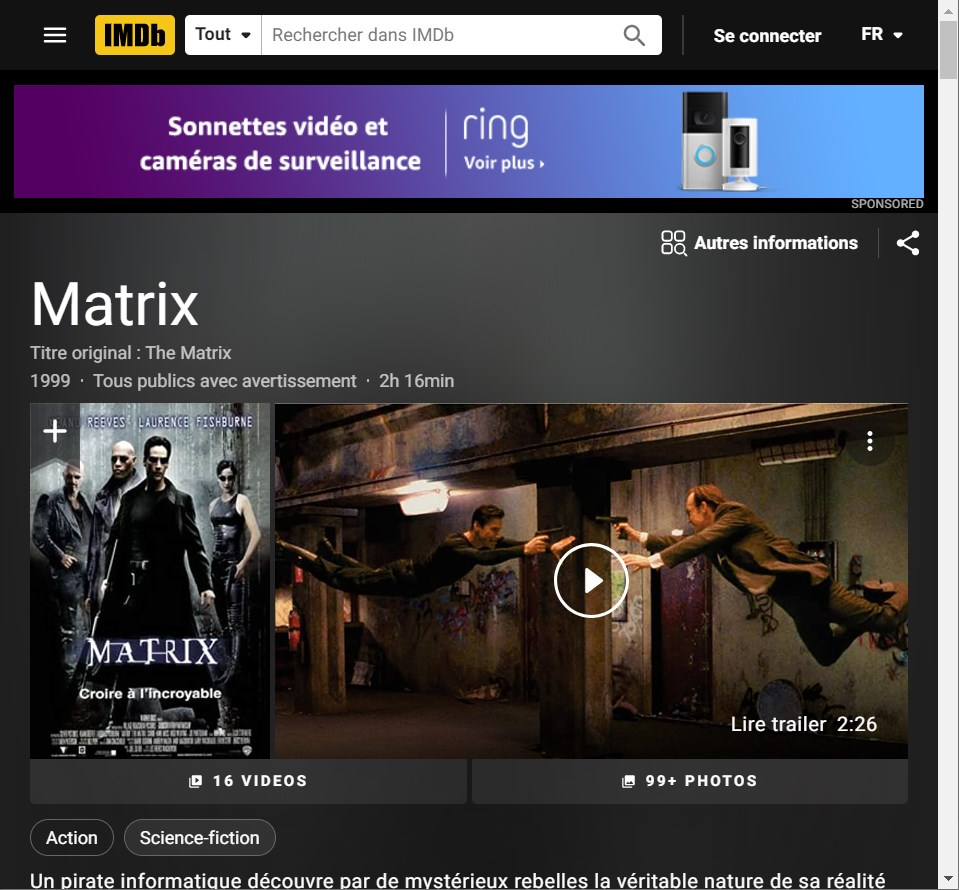

In [ ]:
# Importation des bibliothèques pour WebScrapper/traitement des regex:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

In [ ]:
# Préliminaires :utiliser le "requests" de BeautifulSoup 
# pour lancer la lecture de cette page
response = requests.get("https://www.imdb.com/title/tt0133093")
response

<Response [403]>

In [ ]:
# Afficher/accèder à la page Web ci-dessus(url)

page_web = response.text
page_web

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n</body>\r\n</html>\r\n'

In [ ]:
# Lançons l'objet "soup" qui va nous aider à webScrapper 
# TOPO: Le Web scraping (de l’anglais scraping = « gratter/racler ») consiste à extraire des données de sites Internet et 
# à les enregistrer afin de les analyser ou de les utiliser de toute autre façon
soup = BeautifulSoup(response.content)
soup

# /!\ ici la page reste pauvre! 

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

Début de la quête :

In [1]:
texte = "Matrix (31/03/1999) - 130 minutes. IMDB note 9/10 (https://www.imdb.com/title/tt0133093). Thomas A. Anderson (Keanu Reeves), un jeune informaticien connu dans le monde du hacking sous le pseudonyme de Neo, est contacté via son ordinateur par ce qu’il pense être un groupe de hackers. Ils lui font découvrir que le monde dans lequel il vit n’est qu’un monde virtuel, la matrice, dans lequel les êtres humains sont gardés sous contrôle. Morpheus (Laurence Fishburne), le capitaine du Nebuchadnezzar, contacte Neo et pense que celui-ci est l’Élu qui peut libérer les êtres humains du joug des machines et prendre le contrôle de la matrice"


In [2]:
# Exemple : je recherche toutes les suites de chiffres ('31', '03', '1999', '130', '9', '10', '0133093') contenues dans le texte

import re
re.findall('\d+', texte)

['31', '03', '1999', '130', '9', '10', '0133093']

1. Trouve l'expression régulière qui cherche la seule occurrence du deuxième prénom de Néo (soit le A. de "Thomas A. Anderson).

En inspectant avec le curseur, on observe quele prénom recherché est contenu à l'intérieur d'une balise div, qui a la class "ipc-html-content-inner-div".

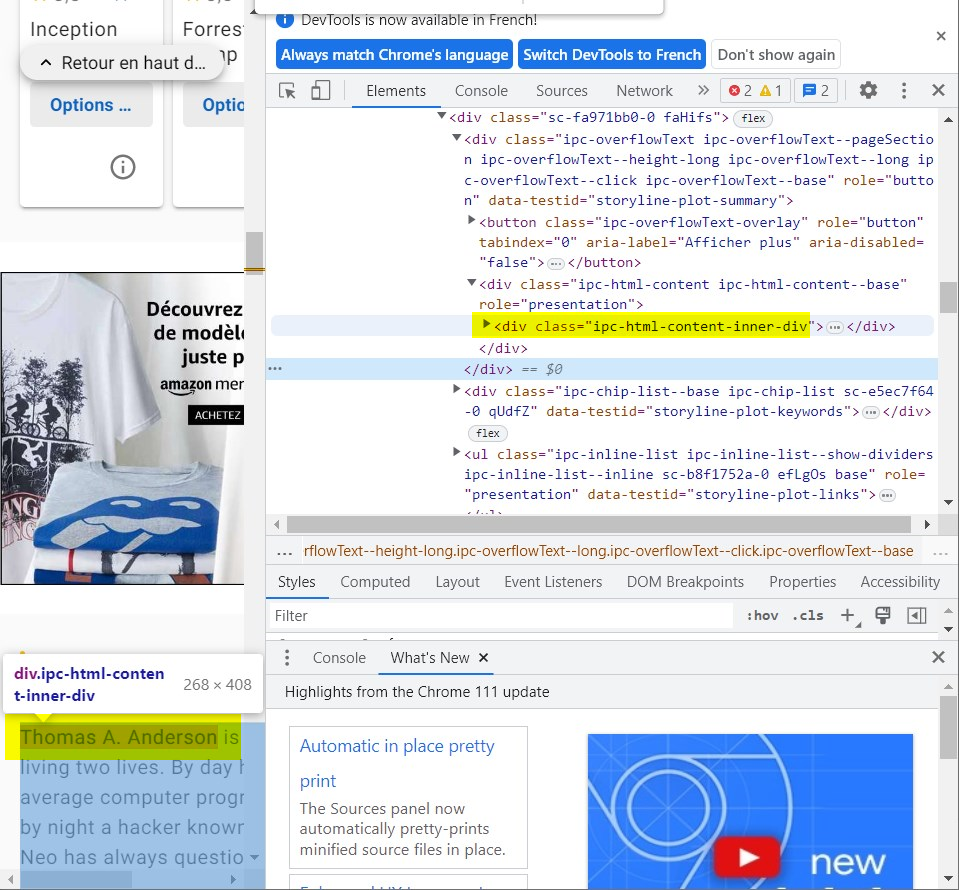

In [3]:
# Réponse à la question (methode regex): 1.Trouve l'expression régulière qui cherche la seule occurrence du deuxième prénom de Néo (soit le A. de "Thomas A. Anderson)
import re
re.findall("[A][.]", texte)

['A.']

In [12]:
# Autre réponse à la question (methode regex) : 1.Trouve l'expression régulière qui cherche la seule occurrence du deuxième prénom de Néo (soit le A. de "Thomas A. Anderson)
import re
re.findall("A\.", texte)

['A.']

In [ ]:
# Autre réponse à la question (à l'aide du Webscrapping de la page)(/!\ A REVOIR): 
# 1. Trouve l'expression régulière qui cherche la seule occurrence du deuxième prénom de Néo (soit le A. de "Thomas A. Anderson).

for all_mame_with_A_point in soup.find_all("div", class_="ipc-html-content-inner-div"): # all_mame_with_A_point =Nom de la liste de string où il y a "A."
  print(all_mame_with_A_point .find("h1").find("Thomas A. Anderson").string)

In [13]:
# Autrement (à l'aide du Webscrapping de la page):
# TOPO: Pour rechercher un ou plusieurs motifs dans un texte, 
# on peut également se servir de ?. Dans l'outil en ligne, utilise le motif re[mwc]? 
# pour retouver 'rem', 'rew' ou 'rec' dans le texte, par exemple.

import re

#Recherche d'une séquence commençant par "Thomas", suivie de 0 ou 1 (n'importe quel) caractère, et d'un "A." :
x = re.findall("Thomas?A.",texte) # "reponse" est le texte où chercher!

print(x)

# Méthode pas fameuse !

[]


2. Trouve l'expression régulière qui cherche la date contenue dans le document.

En inspectant la page , on voit que le titre & la date sont dans le div avec id__next "data-reactroot"

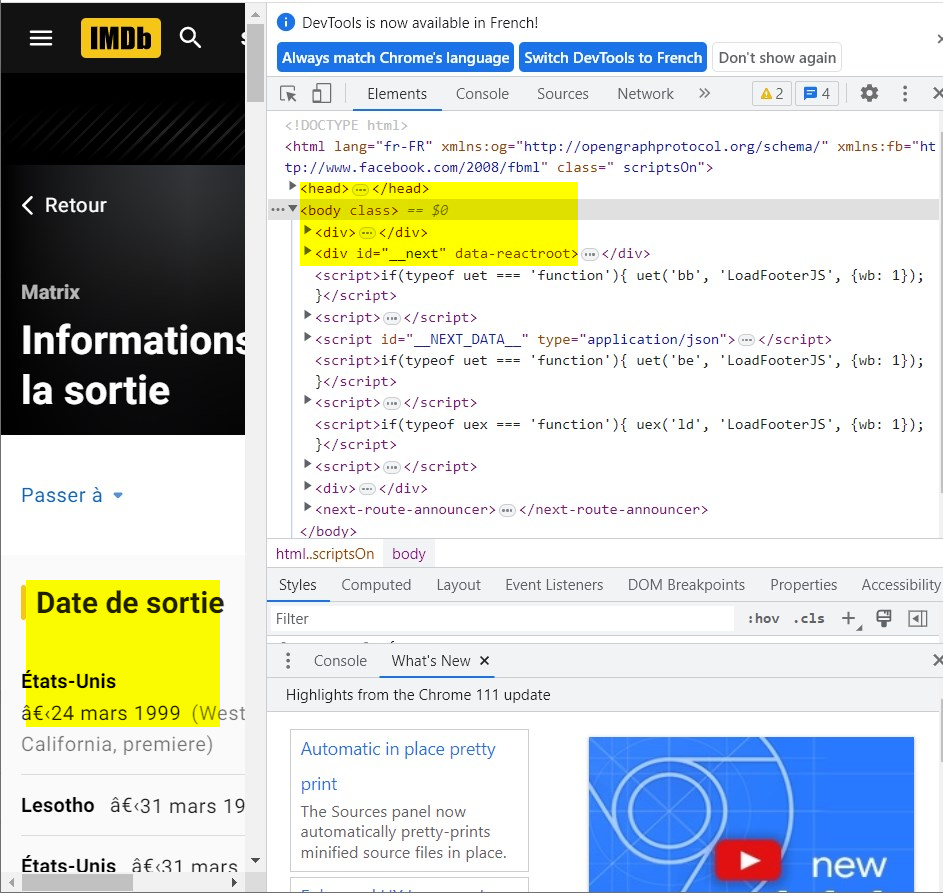

In [6]:
# Réponse à la question (méthode regex): 2. Trouve l'expression régulière qui cherche la date contenue dans le document.
import re
re.findall("\d{2}/\d{2}/\d{4}", texte)

['31/03/1999']

3. Trouve l'expression qui cherche la note contenue dans le texte, sans pour autant sélectionner une partie de la date (tu peux t'aider du caractère espace avant la note)

In [7]:
# Réponse à la question (méthode regex): 3.Trouve l'expression qui cherche la note contenue dans le texte,
# sans pour autant sélectionner une partie de la date (tu peux t'aider du caractère espace avant la note)
import re
re.findall("\s\d{1}/\d{2}", texte)

[' 9/10']

In [11]:
# Autre réponse à la question : 3.Trouve l'expression qui cherche la note contenue dans le texte,
# sans pour autant sélectionner une partie de la date (tu peux t'aider du caractère espace avant la note)
import re
note= r'(?<=IMDB note )\d/\d\d'
note = re.findall(note, texte)
note

['9/10']

4. Trouve l'expression régulière qui renvoie les mots ayant au moins 14 caractères (tu devrais trouver l'age du capitaine, à moins que ça ne soit son vaisseau !)

In [8]:
# Réponse à la question (méthode regex): 4.Trouve l'expression régulière qui renvoie les mots ayant au moins 14 caractères 
# (tu devrais trouver l'age du capitaine, à moins que ça ne soit son vaisseau !)
import re

# Correspondre à 14 caractères minimum.

re.findall("[A-Za-z0-9#,.\-_]{14,}", texte)
     

['Nebuchadnezzar,']

In [ ]:
# Autre réponse à la question : 4.Trouve l'expression régulière qui renvoie les mots ayant au moins 14 caractères 
# (tu devrais trouver l'age du capitaine, à moins que ça ne soit son vaisseau !)
import re
mots = r'\b\w{14,}\b'
mots = re.findall(mots, texte)
mots

5. Trouve l'expression régulière qui correspond à l'url de la fiche du film sur IMDB https://www.imdb.com/title/tt0133093 (attention à ne pas sélectionner les parenthèses)

In [9]:
# Réponse à la question (méthode regex): 5.Trouve l'expression régulière qui correspond à l'url de la fiche du film sur IMDB https://www.imdb.com/title/tt0133093
# (attention à ne pas sélectionner les parenthèses)
import re

re.findall("https?:\/\/(?:www\.)[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{,}", texte)

['https://www.imdb.com/title/tt0133093).']

In [10]:
# Autre réponse à la question : 5.Trouve l'expression régulière qui correspond à l'url de la fiche du film sur IMDB https://www.imdb.com/title/tt0133093
# (attention à ne pas sélectionner les parenthèses)
import re
url= r'https://www\.imdb\.com/title/\w+/?'
url = re.findall(url, texte)
url

['https://www.imdb.com/title/tt0133093']